In [6]:
import pandas as pd
import numpy as np

data=pd.read_csv("C:/Users/Raghav Rastogi/Desktop/ml/Datasets/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
'''
#if the dataset would just be a csv file without the column names then :
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI',\
      'DiabetesPedigreeFunction', 'Age', 'Outcome']
data=pd.read_csv('C:/Users/Raghav Rastogi/Desktop/ml/Datasets/diabetes.csv',names=cols)
'''

In [27]:
data_mean=data.groupby('Outcome').mean()
data_mean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [28]:
data_var=data.groupby('Outcome').var()
data_var

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,9.103403,683.362325,326.274693,221.710525,9774.345427,59.133870,0.089452,136.134168
1,13.996870,1020.139457,461.897968,312.572195,19234.673319,52.750693,0.138648,120.302588


In [29]:
n_diab=data['Outcome'][data['Outcome']==1].count()
n_non_diab=data['Outcome'][data['Outcome']==0].count()
total_ppl=data['Outcome'][data['Outcome']].count()

p_diab=n_diab/total_ppl
p_non_diab=n_non_diab/total_ppl

In [35]:
diab_preg_mean=data_mean['Pregnancies'][data_mean.index==1].values[0]
diab_glu_mean=data_mean['Glucose'][data_mean.index==1].values[0]
diab_bp_mean=data_mean['BloodPressure'][data_mean.index==1].values[0]
diab_sk_mean=data_mean['SkinThickness'][data_mean.index==1].values[0]
diab_ins_mean=data_mean['Insulin'][data_mean.index==1].values[0]
diab_bmi_mean=data_mean['BMI'][data_mean.index==1].values[0]
diab_dpf_mean=data_mean['DiabetesPedigreeFunction'][data_mean.index==1].values[0]
diab_age_mean=data_mean['Age'][data_mean.index==1].values[0]


non_diab_preg_mean=data_mean['Pregnancies'][data_mean.index==0].values[0]
non_diab_glu_mean=data_mean['Glucose'][data_mean.index==0].values[0]
non_diab_bp_mean=data_mean['BloodPressure'][data_mean.index==0].values[0]
non_diab_sk_mean=data_mean['SkinThickness'][data_mean.index==0].values[0]
non_diab_ins_mean=data_mean['Insulin'][data_mean.index==0].values[0]
non_diab_bmi_mean=data_mean['BMI'][data_mean.index==0].values[0]
non_diab_dpf_mean=data_mean['DiabetesPedigreeFunction'][data_mean.index==0].values[0]
non_diab_age_mean=data_mean['Age'][data_mean.index==0].values[0]



diab_preg_var=data_var['Pregnancies'][data_var.index==1].values[0]
diab_glu_var=data_var['Glucose'][data_var.index==1].values[0]
diab_bp_var=data_var['BloodPressure'][data_var.index==1].values[0]
diab_sk_var=data_var['SkinThickness'][data_var.index==1].values[0]
diab_ins_var=data_var['Insulin'][data_var.index==1].values[0]
diab_bmi_var=data_var['BMI'][data_var.index==1].values[0]
diab_dpf_var=data_var['DiabetesPedigreeFunction'][data_var.index==1].values[0]
diab_age_var=data_var['Age'][data_var.index==1].values[0]

non_diab_preg_var=data_var['Pregnancies'][data_var.index==0].values[0]
non_diab_glu_var=data_var['Glucose'][data_var.index==0].values[0]
non_diab_bp_var=data_var['BloodPressure'][data_var.index==0].values[0]
non_diab_sk_var=data_var['SkinThickness'][data_var.index==0].values[0]
non_diab_ins_var=data_var['Insulin'][data_var.index==0].values[0]
non_diab_bmi_var=data_var['BMI'][data_var.index==0].values[0]
non_diab_dpf_var=data_var['DiabetesPedigreeFunction'][data_var.index==0].values[0]
non_diab_age_var=data_var['Age'][data_var.index==0].values[0]




In [48]:
def p_x_given_y(x,mean_y,var_y):
    p=1/(np.sqrt(2*np.pi*var_y))*np.exp((-(x-mean_y)**2)/(2*var_y))
    return p


In [49]:
person=pd.DataFrame()
person['Pregnancies']=[6]
person['Glucose']=[148]
person['BloodPressure']=[72]
person['SkinThickness']=[35]
person['Insulin']=[0]
person['BMI']=[33.6]
person['DiabetesPedigreeFunction']=[0.627]
person['Age']=[50]

In [50]:
p_if_diab=p_diab* \
p_x_given_y(person['Pregnancies'][0],diab_preg_mean,diab_preg_var)* \
p_x_given_y(person['Glucose'][0],diab_glu_mean,diab_glu_var)* \
p_x_given_y(person['BloodPressure'][0],diab_bp_mean,diab_bp_var)* \
p_x_given_y(person['SkinThickness'][0],diab_sk_mean,diab_sk_var)* \
p_x_given_y(person['Insulin'][0],diab_ins_mean,diab_ins_var)* \
p_x_given_y(person['BMI'][0],diab_bmi_mean,diab_bmi_var)* \
p_x_given_y(person['DiabetesPedigreeFunction'][0],diab_dpf_mean,diab_dpf_var)* \
p_x_given_y(person['Age'][0],diab_age_mean,diab_age_var)

p_if_diab

3.1582472589428585e-13

In [51]:
p_if_non_diab=p_non_diab* \
p_x_given_y(person['Pregnancies'][0],non_diab_preg_mean,non_diab_preg_var)* \
p_x_given_y(person['Glucose'][0],non_diab_glu_mean,non_diab_glu_var)* \
p_x_given_y(person['BloodPressure'][0],non_diab_bp_mean,non_diab_bp_var)* \
p_x_given_y(person['SkinThickness'][0],non_diab_sk_mean,non_diab_sk_var)* \
p_x_given_y(person['Insulin'][0],non_diab_ins_mean,non_diab_ins_var)* \
p_x_given_y(person['BMI'][0],non_diab_bmi_mean,non_diab_bmi_var)* \
p_x_given_y(person['DiabetesPedigreeFunction'][0],non_diab_dpf_mean,non_diab_dpf_var)* \
p_x_given_y(person['Age'][0],non_diab_age_mean,non_diab_age_var)

p_if_non_diab

1.5601046357664645e-13

In [ ]:
# p_if_diab>p_if_non_diab  therfore its diab

# till here the model performed well for the single person test data now we will split the data and train it again and then perform the test on test data

In [164]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

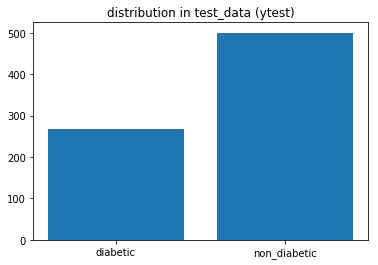

In [172]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=9)
ytest
import matplotlib.pyplot as plt
yes=y[y==1].count()
no=y[y==0].count()
val={'diabetic':yes,'non_diabetic':no}
plt.bar(val.keys(),val.values())
plt.title('distribution in test_data (ytest)')
plt.show()

In [173]:
xtrain['Outcome']=ytrain
xtrain_mean=xtrain.groupby('Outcome').mean()
xtrain_mean


C:\Users\Raghav Rastogi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.362500,110.172500,68.285000,19.895000,70.87250,30.287750,0.431830,31.177500
1,4.906542,141.724299,70.635514,22.060748,99.28972,35.114953,0.559313,37.331776


In [174]:
xtrain_var=xtrain.groupby('Outcome').var()
xtrain_var

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,9.870771,637.862400,320.520075,214.144336,9837.279442,59.012306,0.087818,140.216535
1,13.502962,1013.083257,492.890000,316.461081,19419.709096,59.421090,0.134715,119.753258


In [175]:

n_dia=xtrain['Outcome'][xtrain['Outcome']==1].count()
n_non_dia=xtrain['Outcome'][xtrain['Outcome']==0].count()
total=xtrain['Outcome'][xtrain['Outcome']].count()

p_dia=n_dia/total
p_non_dia=n_non_dia/total


In [176]:
def p_x_given_y(x,mean_y,var_y):
    p=1/(np.sqrt(2*np.pi*var_y))*np.exp((-(x-mean_y)**2)/(2*var_y))
    return p

### here we have taken all the values directly from the dataframes instead of storing them into variables , it reduces the readeability but greateky reduces the code length

In [177]:
m=len(xtest)
res_dia=np.zeros(m)
res_non_dia=np.zeros(m)
for i in range(m):
    #p_x_given_y(xtest.iloc[i]['Pregnancies'],)
    temp_res1=1
    temp_res2=1
    for j in range(xtrain.shape[1]-1):
        temp_res1=temp_res1*p_x_given_y(xtest.iloc[i][j],xtrain_mean.iloc[1][j],xtrain_var.iloc[1][j])
        
        temp_res2=temp_res2*p_x_given_y(xtest.iloc[i][j],xtrain_mean.iloc[0][j],xtrain_var.iloc[0][j])
    res_dia[i]=p_dia*temp_res1
    res_non_dia[i]=p_non_dia*temp_res2
    



In [178]:
my_result=np.zeros(m)
for i in range(m):
    if res_dia[i]>res_non_dia[i]:
        my_result[i]=1
    else:
        my_result[i]=0

new_df=pd.DataFrame({'actual':ytest,'predicted':my_result})
new_df.head(20)

,actual,predicted
456,0,0.0
260,0,1.0
651,0,0.0
143,1,0.0
666,1,0.0
390,0,0.0
591,0,0.0
77,0,0.0
414,1,0.0
494,0,0.0


In [179]:
new_ytest=ytest.as_matrix()
accuracy=np.mean(new_ytest.flatten()==my_result.flatten())
print("ACCURACY :",accuracy*100,"%")


ACCURACY : 75.97402597402598 %


C:\Users\Raghav Rastogi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


* you can also declare each variable like below for diabetic and non diabetic mean and variance for each columns and then use them in formula 

In [ ]:
dia_preg_mean=xtrain_mean['Pregnancies'][xtrain_mean.index==1].values[0]
dia_glu_mean=xtrain_mean['Glucose'][xtrain_mean.index==1].values[0]
dia_bp_mean=xtrain_mean['BloodPressure'][xtrain_mean.index==1].values[0]
dia_sk_mean=xtrain_mean['SkinThickness'][xtrain_mean.index==1].values[0]
dia_ins_mean=xtrain_mean['Insulin'][xtrain_mean.index==1].values[0]
dia_bmi_mean=xtrain_mean['BMI'][xtrain_mean.index==1].values[0]
dia_dpf_mean=xtrain_mean['DiabetesPedigreeFunction'][xtrain_mean.index==1].values[0]
dia_age_mean=xtrain_mean['Age'][xtrain_mean.index==1].values[0]
